In [57]:
import pandas as pd

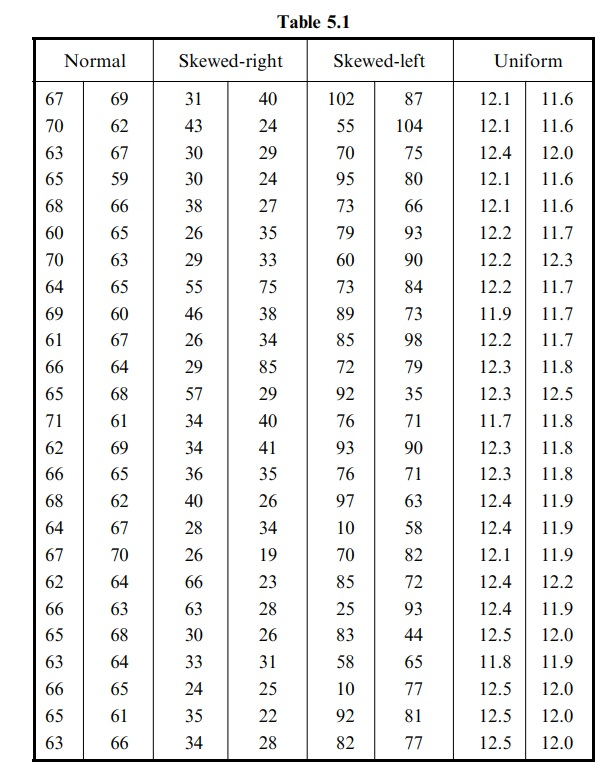

#FA4

##Importing Table

In [58]:
data = {
    'Normal': [67, 70, 63, 65, 68, 60, 70, 64, 69, 61, 66, 65, 71, 62, 66, 68, 64, 67, 62, 66, 65, 63, 66, 65, 63,69, 62, 67, 59, 66, 65, 63, 65, 60, 67, 64, 68, 61, 69, 65, 62, 67, 70, 64, 63, 68, 64, 65, 61, 66],
    'Skewed-right': [31, 43, 30, 30, 38, 26, 29, 55, 46, 26, 29, 57, 34, 34, 36, 40, 28, 26, 66, 63, 30, 33, 24, 35, 34, 40, 24, 29, 24, 27, 35, 33, 75, 38, 34, 85, 29, 40, 41, 35, 26, 34, 19, 23, 28, 26, 31, 25, 22, 28],
    'Skewed-left': [102, 55, 70, 95, 73, 79, 60, 73, 89, 85, 72, 92, 76, 93, 76, 97, 10, 70, 85, 25, 83, 58, 10, 92, 82, 87, 104, 75, 80, 66, 93, 90, 84, 73, 98, 79, 35, 71, 90, 71, 63, 58, 82, 72, 93, 44, 65, 77, 81, 77],
    'Uniform': [12.1, 12.1, 12.4, 12.1, 12.1, 12.2, 12.2, 12.2, 11.9, 12.2, 12.3, 12.3, 11.7, 12.3, 12.3, 12.4, 12.4, 12.1, 12.4, 12.4, 12.5, 11.8, 12.5, 12.5, 12.5,11.6, 11.6, 12.0, 11.6, 11.6, 11.7, 12.3, 11.7, 11.7, 11.7, 11.8, 12.5, 11.8, 11.8, 11.8, 11.9, 11.9, 11.9, 11.9, 11.9, 12.0, 11.9, 12.0, 12.0, 12.0],
}
df = pd.DataFrame(data)

In [59]:
df

,Normal,Skewed-right,Skewed-left,Uniform
0,67,31,102,12.1
1,70,43,55,12.1
2,63,30,70,12.4
3,65,30,95,12.1
4,68,38,73,12.1
5,60,26,79,12.2
6,70,29,60,12.2
7,64,55,73,12.2
8,69,46,89,11.9
9,61,26,85,12.2


In [60]:
df.shape

(50, 4)

##Item 1. First to Fourth Moments

In [61]:
def calculate_moments(series):
    mean = series.mean()
    moments = {
        '1st Moment (Mean)': mean,
        '2nd Moment (Variance)': ((series - mean) ** 2).mean(),
        '3rd Moment (Skewness)': ((series - mean) ** 3).mean(),
        '4th Moment (Kurtosis)': ((series - mean) ** 4).mean(),
    }
    return pd.Series(moments)

moments_df = df.apply(calculate_moments)
moments_df

,Normal,Skewed-right,Skewed-left,Uniform
1st Moment (Mean),65.120000,35.480000,74.2000,12.050000
2nd Moment (Variance),8.305600,178.889600,419.7600,0.078900
3rd Moment (Skewness),-0.471744,4588.128384,-12498.2640,0.001620
4th Moment (Kurtosis),160.948626,210642.883436,927289.7472,0.011276


##Item 2. First to Fourth Moments about the mean

In [62]:
def moments_mean(series):
    mean = series.mean()
    moments = {
        '1st Moment (Mean)': 0,
        '2nd Moment (Variance)': ((series - mean) ** 2).mean(),
        '3rd Moment (Skewness)': ((series - mean) ** 3).mean(),
        '4th Moment (Kurtosis)': ((series - mean) ** 4).mean(),
    }
    return pd.Series(moments)

moments_abt_mean = df.apply(moments_mean)

In [63]:
moments_abt_mean

,Normal,Skewed-right,Skewed-left,Uniform
1st Moment (Mean),0.000000,0.000000,0.0000,0.000000
2nd Moment (Variance),8.305600,178.889600,419.7600,0.078900
3rd Moment (Skewness),-0.471744,4588.128384,-12498.2640,0.001620
4th Moment (Kurtosis),160.948626,210642.883436,927289.7472,0.011276


##Item 3. First to Fourth moments about 75

In [64]:
c = 75
def moments_about_c(series, c):
    moments = {
        '1st Moment about 75': ((series - c) ** 1).mean(),
        '2nd Moment about 75': ((series - c) ** 2).mean(),
        '3rd Moment about 75': ((series - c) ** 3).mean(),
        '4th Moment about 75': ((series - c) ** 4).mean(),
    }
    return pd.Series(moments)

moments_about_75 = moments_about_c(df['Normal'], c)

In [65]:
moments_about_75

1st Moment about 75       -9.88
2nd Moment about 75      105.92
3rd Moment about 75    -1211.08
4th Moment about 75    14572.64
dtype: float64

##Item 4. Verifiying relations

In [66]:
m2 = moments_abt_mean.loc['2nd Moment (Variance)', 'Normal']
m3 = moments_abt_mean.loc['3rd Moment (Skewness)', 'Normal']
m4 = moments_abt_mean.loc['4th Moment (Kurtosis)', 'Normal']

m1_prime = moments_about_75['1st Moment about 75']
m2_prime = moments_about_75['2nd Moment about 75']
m3_prime = moments_about_75['3rd Moment about 75']
m4_prime = moments_about_75['4th Moment about 75']

verified_relations = {
    "Verified m2": m2_prime - m1_prime**2,
    "Verified m3": m3_prime - 3*m1_prime*m2_prime + 2*m1_prime**3,
    "Verified m4": m4_prime - 4*m1_prime*m3_prime + 6*(m1_prime**2)*m2_prime - 3*m1_prime**4
}

actual_vs_verified = pd.DataFrame({
    'Actual Moments': [m2, m3, m4],
    'Verified Moments': [verified_relations['Verified m2'], verified_relations['Verified m3'], verified_relations['Verified m4']]
})

In [67]:
actual_vs_verified

,Actual Moments,Verified Moments
0,8.305600,8.305600
1,-0.471744,-0.471744
2,160.948626,160.948626


Since the actual moments and the verified moments are the same, the relations are true.